<a href="https://colab.research.google.com/github/Jorayala/AI_Machine_Learning_2024/blob/main/Etapa_2_Projecto_ML_Arboles_y_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Datos_Etapa-2.csv', sep=';', na_values=['?'], encoding = 'utf-8')

In [ ]:
data_raw.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,NO
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO


In [ ]:
data_raw.shape

(3276, 10)

Explorando la variable objetivo

In [ ]:
pd.value_counts(data_raw['Potabilidad'])

NO    1998
SI    1278
Name: Potabilidad, dtype: int64

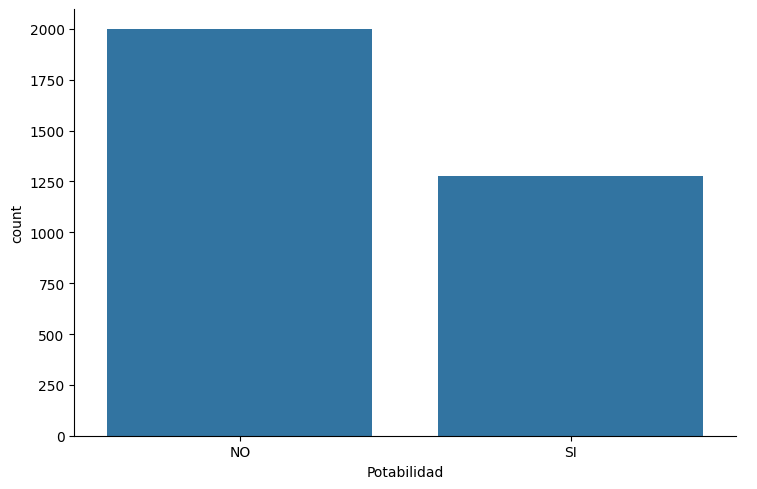

In [ ]:
sns.catplot(x='Potabilidad', data=data_raw, kind='count', height=5, aspect=1.5)

In [ ]:
data = data_raw.copy()

In [ ]:
data.columns.unique()

Index(['pH', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfatos', 'Conductividad',
       'Carbono_orgánico', 'Trihalometanos', 'Turbidez', 'Potabilidad'],
      dtype='object')

Deteccion de valores ausentes

In [ ]:
data.isna()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [ ]:
data.isna().sum()

pH                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            781
Conductividad         0
Carbono_orgánico      0
Trihalometanos      162
Turbidez              0
Potabilidad           0
dtype: int64

Ya que el numero de datos faltantes es casi un tercion del total, se toma la decision de reemplazar los valores faltantes por el promedio de los datos de cada columna

In [ ]:
columns_to_fill = ['pH', 'Sulfatos', 'Trihalometanos']
for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].mean())


In [ ]:
data.isna().sum()

pH                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfatos            0
Conductividad       0
Carbono_orgánico    0
Trihalometanos      0
Turbidez            0
Potabilidad         0
dtype: int64

In [ ]:
data.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,7.080804,204.89,20791.32,7.30,368.520000,564.31,10.38,86.99,2.96,NO
1,3.720000,129.42,18630.06,6.64,333.775784,592.89,15.18,56.33,4.50,NO
2,8.100000,224.24,19909.54,9.28,333.775784,418.61,16.87,66.42,3.06,NO
3,8.320000,214.37,22018.42,8.06,356.890000,363.27,18.44,100.34,4.63,NO
4,9.090000,181.10,17978.99,6.55,310.140000,398.41,11.56,32.00,4.08,NO


<Axes: >

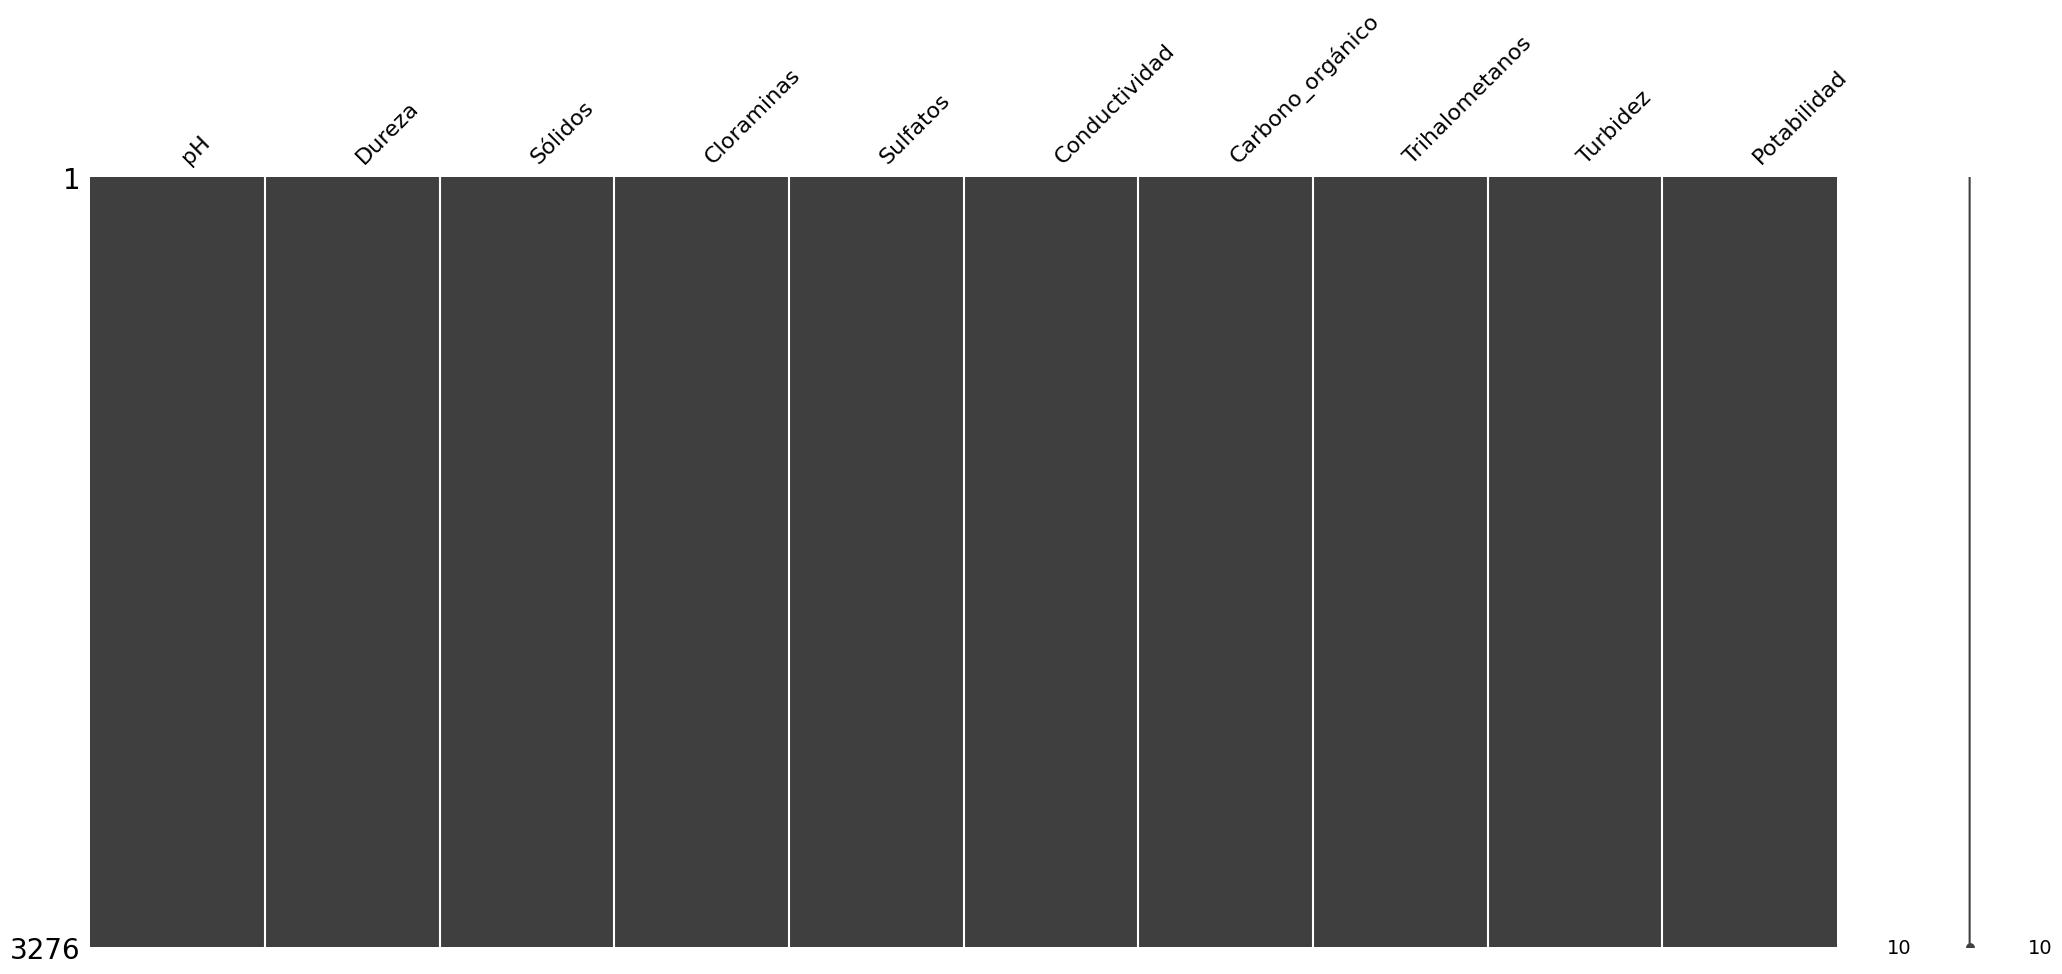

In [ ]:
msno.matrix(data) #visualizar presencia o ausencia de valores faltantes

Eliminacion de duplicados

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pH                3276 non-null   float64
 1   Dureza            3276 non-null   float64
 2   Sólidos           3276 non-null   float64
 3   Cloraminas        3276 non-null   float64
 4   Sulfatos          3276 non-null   float64
 5   Conductividad     3276 non-null   float64
 6   Carbono_orgánico  3276 non-null   float64
 7   Trihalometanos    3276 non-null   float64
 8   Turbidez          3276 non-null   float64
 9   Potabilidad       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [ ]:
data.shape

(3276, 10)

<ipython-input-19-916a20f101cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= data_raw[:].corr()


<Axes: >

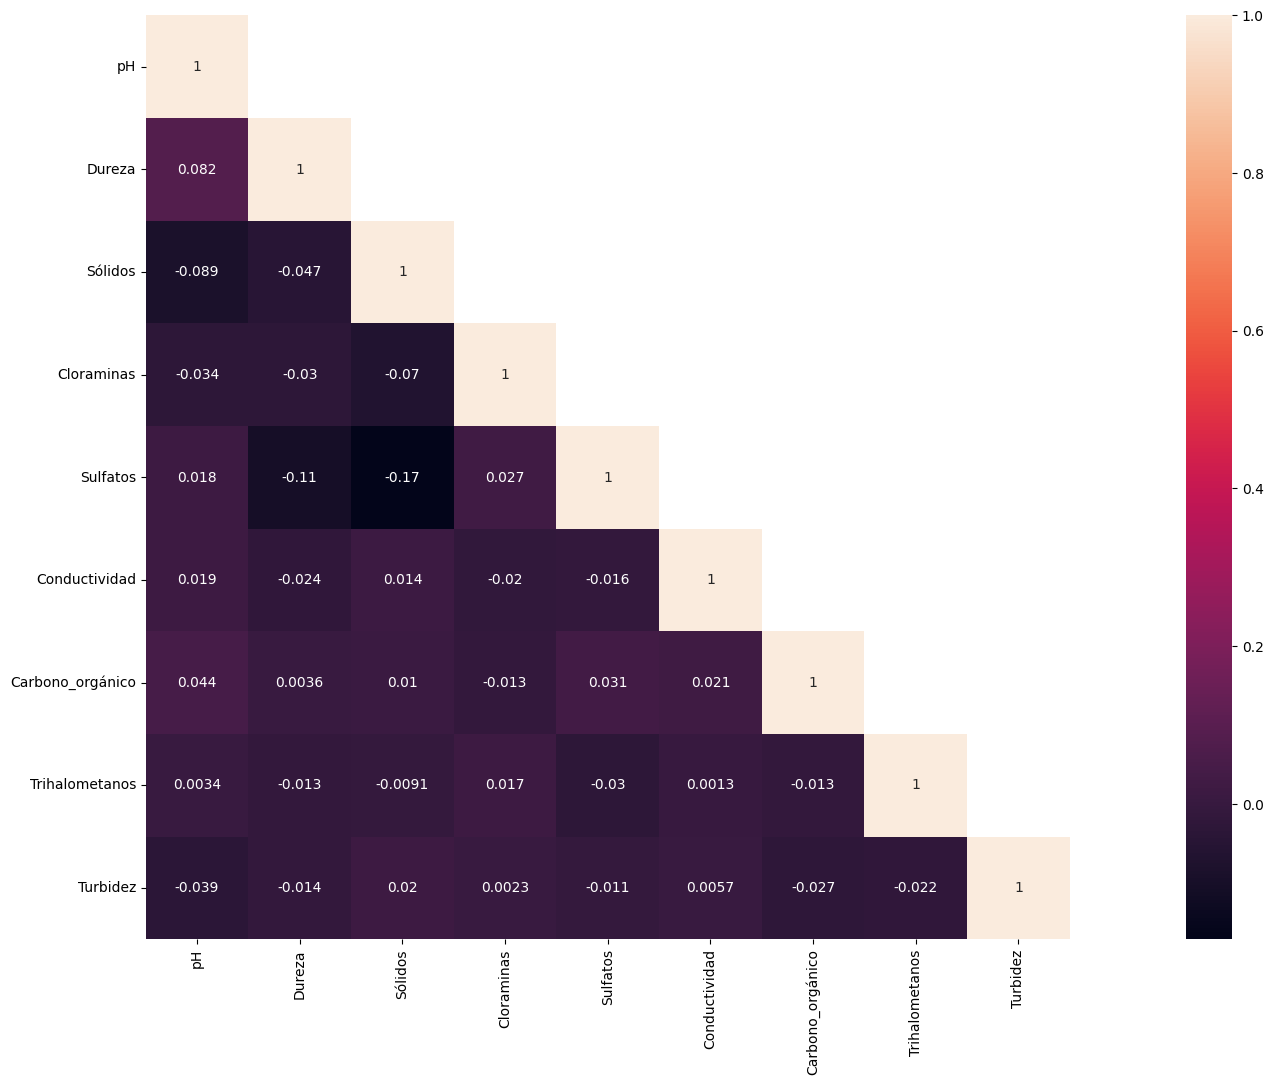

In [ ]:
cor_mat= data_raw[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
data.describe()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731
std,1.470002,32.879680,8768.570852,1.583143,36.142632,80.824123,3.308232,15.769856,0.780354
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000
25%,6.280000,176.847500,15666.687500,6.130000,317.092500,365.735000,12.070000,56.647500,3.440000
50%,7.080804,196.965000,20927.830000,7.130000,333.775784,421.885000,14.220000,66.396281,3.955000
75%,7.870000,216.670000,27332.760000,8.112500,350.385000,481.790000,16.560000,76.667500,4.500000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000


Conversion de variable categorica a numerica

In [ ]:
data.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,7.080804,204.89,20791.32,7.30,368.520000,564.31,10.38,86.99,2.96,NO
1,3.720000,129.42,18630.06,6.64,333.775784,592.89,15.18,56.33,4.50,NO
2,8.100000,224.24,19909.54,9.28,333.775784,418.61,16.87,66.42,3.06,NO
3,8.320000,214.37,22018.42,8.06,356.890000,363.27,18.44,100.34,4.63,NO
4,9.090000,181.10,17978.99,6.55,310.140000,398.41,11.56,32.00,4.08,NO


In [ ]:

data['Potabilidad'] = data['Potabilidad'].map({'NO': 0, 'SI': 1})


In [ ]:
data.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,7.080804,204.89,20791.32,7.30,368.520000,564.31,10.38,86.99,2.96,0
1,3.720000,129.42,18630.06,6.64,333.775784,592.89,15.18,56.33,4.50,0
2,8.100000,224.24,19909.54,9.28,333.775784,418.61,16.87,66.42,3.06,0
3,8.320000,214.37,22018.42,8.06,356.890000,363.27,18.44,100.34,4.63,0
4,9.090000,181.10,17978.99,6.55,310.140000,398.41,11.56,32.00,4.08,0


In [ ]:
pd.value_counts(data['Potabilidad'])

0    1998
1    1278
Name: Potabilidad, dtype: int64

Division de datos en entrenamiento y prueba

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
3126,6.67,155.71,30610.05,8.17,337.170000,425.69,15.10,79.78,4.90,1
3147,6.26,130.37,9734.68,10.28,320.360000,399.35,10.85,43.42,3.93,1
2844,6.66,182.39,16828.88,7.07,355.900000,434.66,16.62,69.41,3.97,1
1916,8.02,255.26,30854.83,8.76,333.775784,442.50,11.09,93.27,5.32,1
1053,8.92,207.52,13291.92,8.56,357.940000,468.54,15.69,107.28,4.08,0


In [ ]:
x_train = train.drop(['Potabilidad'],axis=1)
y_train = train['Potabilidad']

Busqueda de Hiperparametros

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [ ]:
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': [4, 6, 8, 10, 12],
              'min_samples_split': [3, 4, 5]}

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
grid = GridSearchCV(decision_tree, param_grid, cv=kfold, n_jobs=-1)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [3, 4, 5]})

In [ ]:
print("Mejores parámetros: {}".format(grid.best_params_))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3}


In [ ]:
mejor_modelo = grid.best_estimator_

In [ ]:
importancia = mejor_modelo.feature_importances_
importancia

array([0.18777224, 0.19517116, 0.11498833, 0.        , 0.35294457,
       0.        , 0.10367299, 0.        , 0.04545071])

In [ ]:
importancia_df = pd.DataFrame(data={'Variable':x_train.columns, 'Importancia':importancia})
importancia_df.sort_values('Importancia', ascending=False)

,Variable,Importancia
4,Sulfatos,0.352945
1,Dureza,0.195171
0,pH,0.187772
2,Sólidos,0.114988
6,Carbono_orgánico,0.103673
8,Turbidez,0.045451
3,Cloraminas,0.000000
5,Conductividad,0.000000
7,Trihalometanos,0.000000


Se puede ver que la variable mas importante es "Sulfatos", y variables como "Cloraminas", "Conductividad" y "Trihalometanos" no tienen relevancia

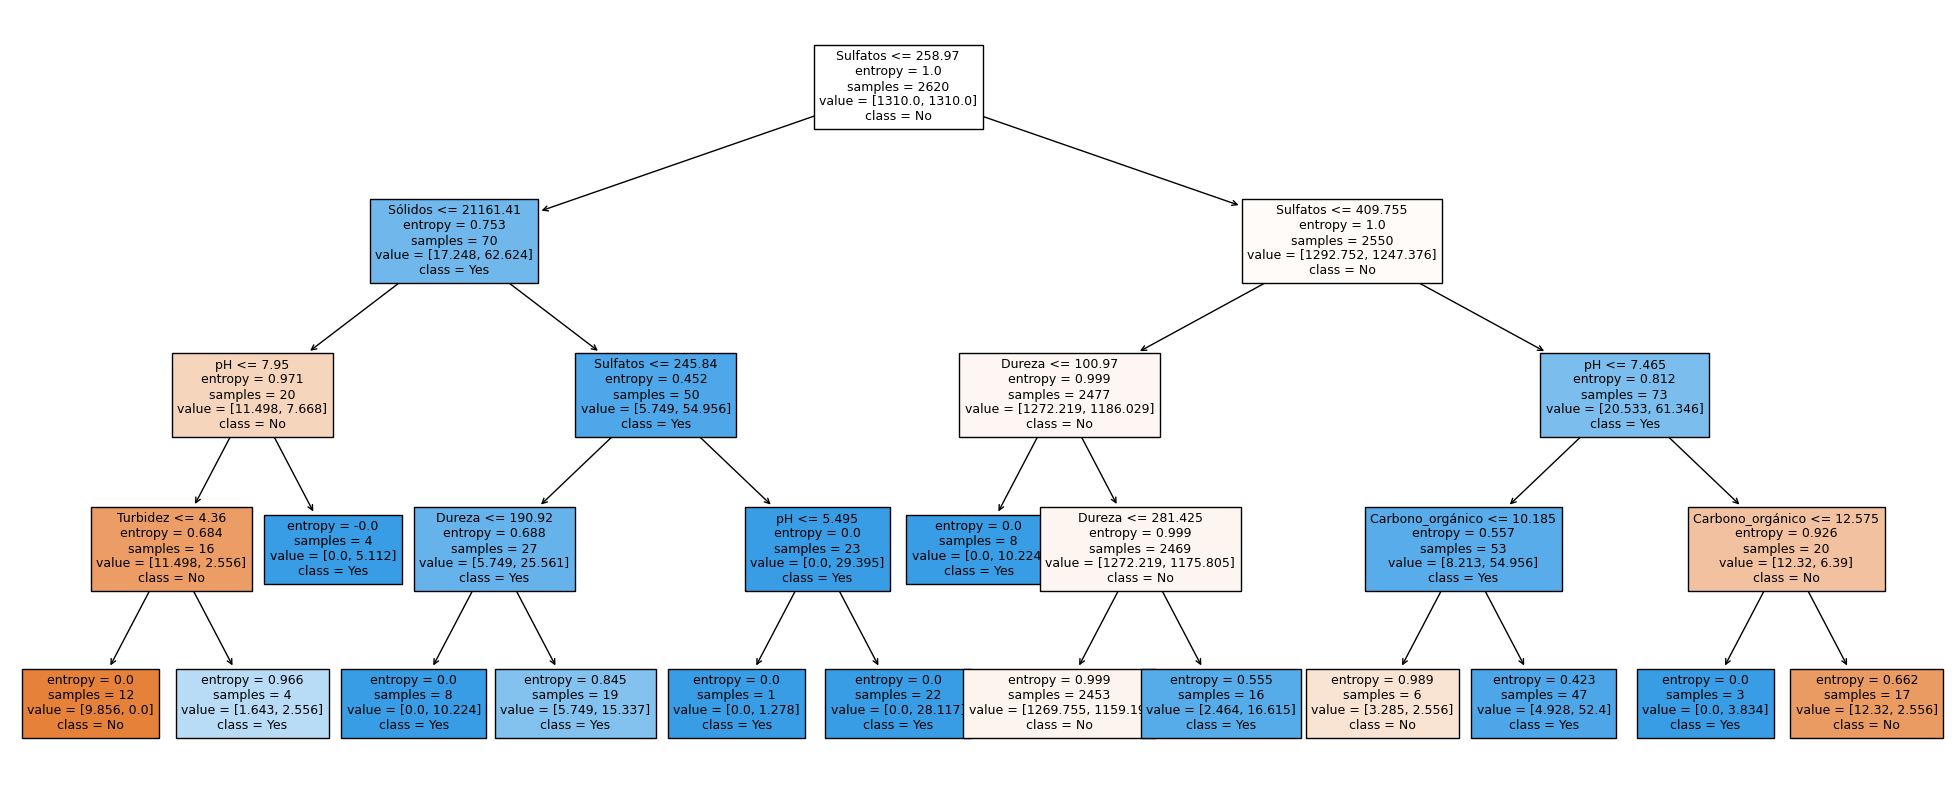

In [ ]:
plt.figure(figsize=(25,10))
tree = plot_tree(mejor_modelo, feature_names=x_train.columns, class_names=['No','Yes'], filled=True, fontsize=9)

Evaluacion del mejor modelo

In [ ]:
x_test = test.drop(['Potabilidad'],axis=1)
y_test = test['Potabilidad']

In [ ]:
y_pred = mejor_modelo.predict(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:

cm = confusion_matrix(y_test, y_pred)

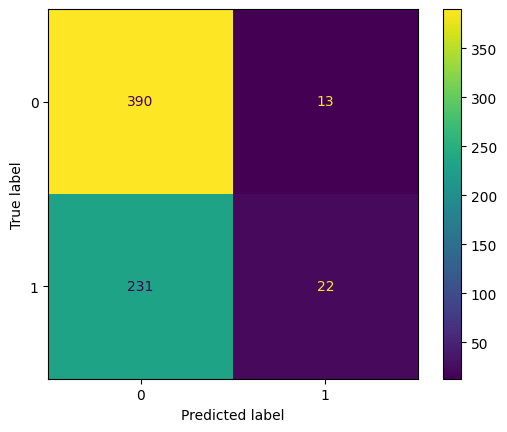

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mejor_modelo.classes_)
disp.plot()

Aqui se puede ver que clasifica mejor la clase 0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76       403
           1       0.63      0.09      0.15       253

    accuracy                           0.63       656
   macro avg       0.63      0.53      0.46       656
weighted avg       0.63      0.63      0.53       656



la precision es la misma para las dos clases pero la sensibilidad es mucho mayor en clase 0

Arbol de Decision profundidad 3

In [ ]:
modelo_profundidad_tres = DecisionTreeClassifier(max_depth=3, random_state=77, class_weight='balanced')
modelo_profundidad_tres.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=77)

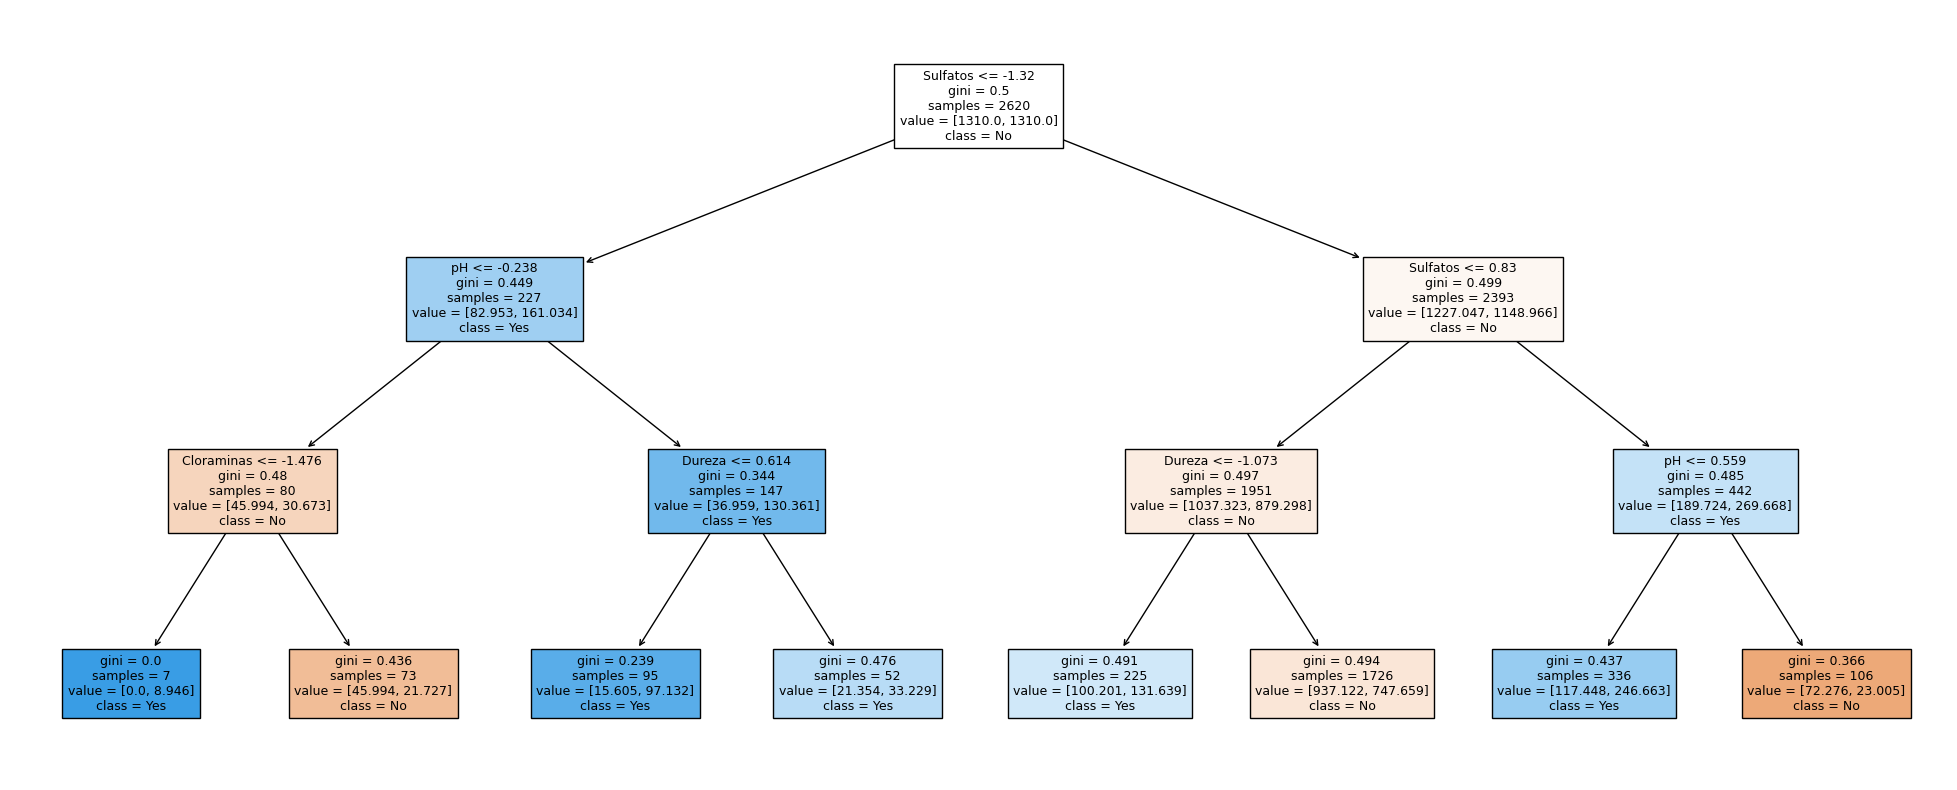

In [ ]:
plt.figure(figsize=(25,10))
tree = plot_tree(modelo_profundidad_tres, feature_names=x_train.columns, class_names=['No','Yes'], filled=True, fontsize=9)
plt.show()

In [ ]:
Esta imagen permite ver gráficamente las reglas de decisión que el árbol ha aprendido para determinar si el agua no es apta para el consumo

Algoritmo K-Vecinos mas cercanos

In [ ]:
x_train


,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
3126,6.670000,155.71,30610.05,8.17,337.170000,425.69,15.10,79.78,4.90
3147,6.260000,130.37,9734.68,10.28,320.360000,399.35,10.85,43.42,3.93
2844,6.660000,182.39,16828.88,7.07,355.900000,434.66,16.62,69.41,3.97
1916,8.020000,255.26,30854.83,8.76,333.775784,442.50,11.09,93.27,5.32
1053,8.920000,207.52,13291.92,8.56,357.940000,468.54,15.69,107.28,4.08
...,...,...,...,...,...,...,...,...,...
1317,6.770000,194.64,15719.49,6.75,339.000000,441.73,22.89,75.47,3.24
2283,7.080804,229.74,22709.39,6.36,316.230000,294.17,16.10,54.59,4.80
2004,7.500000,236.71,21736.37,6.59,407.310000,299.19,20.74,68.31,4.24
607,9.650000,205.21,8508.15,4.95,386.540000,392.77,12.45,53.90,3.19


In [ ]:
x_test

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
2133,7.130000,173.69,19309.57,6.53,372.540000,295.39,7.27,88.79,3.40
761,9.850000,208.74,35289.24,8.35,337.210000,462.48,10.11,50.89,4.52
2269,7.390000,178.34,12928.64,7.83,333.775784,376.49,18.11,40.40,3.85
807,9.870000,223.77,29549.66,7.72,281.120000,356.18,14.20,84.01,4.74
2044,7.080804,108.92,14476.34,5.40,281.200000,512.23,15.01,86.67,3.90
...,...,...,...,...,...,...,...,...,...
1713,8.820000,175.75,23173.32,6.73,367.150000,552.07,7.73,91.44,3.86
1115,8.760000,185.42,31040.88,8.54,333.775784,408.10,18.24,72.30,3.81
2322,9.160000,241.38,28170.89,6.82,262.570000,568.42,8.12,48.26,3.54
605,6.490000,172.86,14625.56,7.74,349.400000,652.54,10.21,56.95,4.67


Estandarizacion (a diferencia de arboles de decision, en KNN si se necesita estandarizar)

In [ ]:
from sklearn.preprocessing import StandardScaler
columns = x_train.columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=columns)
x_train

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
0,-0.289766,-1.239460,0.987408,0.647970,0.095305,0.003071,0.248740,0.857966,1.186226
1,-0.571475,-2.003064,-1.390632,1.971714,-0.373787,-0.322546,-1.044780,-1.458751,-0.045515
2,-0.296637,-0.435477,-0.582489,-0.042134,0.617977,0.113959,0.711364,0.197230,0.005278
3,0.637813,1.760412,1.015292,1.018116,0.000588,0.210878,-0.971734,1.717496,1.719558
4,1.256199,0.321799,-0.985405,0.892643,0.674904,0.532786,0.428312,2.610158,0.144960
...,...,...,...,...,...,...,...,...,...
2615,-0.221056,-0.066331,-0.708866,-0.242892,0.146373,0.201359,2.619687,0.583349,-0.921703
2616,-0.007504,0.991384,0.087396,-0.487565,-0.489037,-1.622788,0.553098,-0.747042,1.059243
2617,0.280523,1.201420,-0.023447,-0.343270,2.052602,-1.560731,1.965318,0.127142,0.348134
2618,1.757778,0.252189,-1.530354,-1.372152,1.473003,-0.403888,-0.557808,-0.791006,-0.985195


In [ ]:
k_values = [1, 2, 3, 4, 5]

In [ ]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
train_scores, val_scores = validation_curve(estimator=KNeighborsClassifier(),
                                            X=x_train,
                                            y=y_train,
                                            param_name='n_neighbors',
                                            param_range=k_values,
                                            scoring='accuracy',
                                            cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

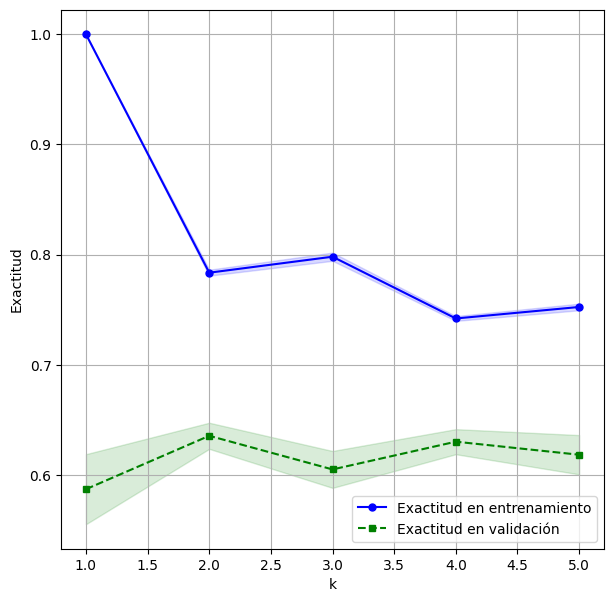

In [ ]:
# Inicializamos la figura
plt.figure(figsize=(7,7))

# Creamos la curva de validación para el conjunto de entrenamiento
plt.plot(k_values, train_mean, color='blue', marker='o', markersize=5, label='Exactitud en entrenamiento')
plt.fill_between(k_values, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

# Creamos la curva de validación para el conjunto de validación
plt.plot(k_values, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Exactitud en validación')
plt.fill_between(k_values, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

# Agregamos una grilla y etiquetas para los ejes
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('k')
plt.ylabel('Exactitud')
plt.show()

In [ ]:
mejor_indice = np.argmax(val_mean)
mejor_indice

1

In [ ]:
mejor_k = k_values[mejor_indice]
mejor_k

2

In [ ]:
mejor_modelo = KNeighborsClassifier(n_neighbors=mejor_k).fit(x_train, y_train)

Evaluacion del mejor modelo

In [ ]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=columns)
x_test

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
0,0.026298,-0.697645,-0.299898,-0.380912,1.082325,-1.607707,-2.134381,1.432048,-0.718529
1,1.895197,0.358563,1.520443,0.760896,0.096422,0.457872,-1.270005,-0.982792,0.703688
2,0.204943,-0.557521,-1.026789,0.434665,0.000588,-0.605143,1.164857,-1.651174,-0.147102
3,1.908939,0.811482,0.866613,0.365654,-1.468802,-0.856216,-0.025182,1.127485,0.983052
4,-0.007504,-2.649446,-0.850481,-1.089837,-1.466569,1.072885,0.221348,1.296970,-0.083611
...,...,...,...,...,...,...,...,...,...
651,1.187489,-0.635568,0.140245,-0.255439,0.931914,1.565390,-1.994376,1.600895,-0.134404
652,1.146263,-0.344169,1.036487,0.880095,0.000588,-0.214378,1.204424,0.381369,-0.197896
653,1.421101,1.342148,0.709549,-0.198976,-1.986450,1.767510,-1.875677,-1.150365,-0.540752
654,-0.413443,-0.722657,-0.833482,0.378202,0.436590,2.807407,-1.239569,-0.596672,0.894164


In [ ]:
y_predknn = mejor_modelo.predict(x_test)

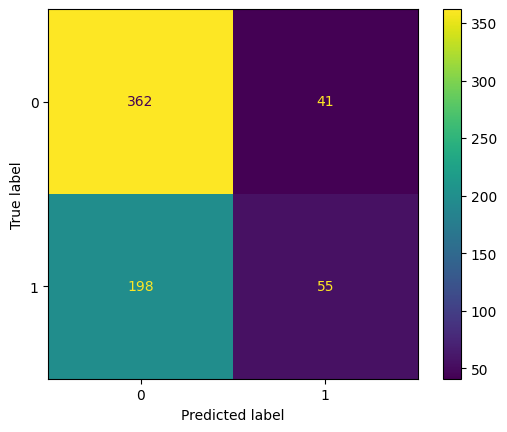

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mejor_modelo, x_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       403
           1       0.57      0.22      0.32       253

    accuracy                           0.64       656
   macro avg       0.61      0.56      0.53       656
weighted avg       0.62      0.64      0.58       656



Tabla comparativa
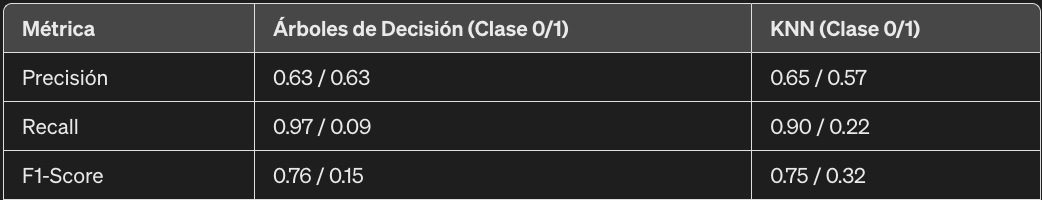

Analisis de resultados

**¿Qué puedes decir de los valores de las métricas recall y precisión para cada una de las clases en cada modelo? ¿Cuál de estás métricas consideras que es más importante con base en la descripción del problema?**

Modelo de Árboles de Decisión:
Clase 0 (agua potable):

Precisión: El modelo tiene una precisión del 63%, lo que indica que de todas las predicciones de agua potable, el 63% eran correctas.
Recall: Con un recall del 97%, el modelo es capaz de identificar el 97% de todas las situaciones reales de agua potable correctamente.
F1-Score: El F1-score de 0.76 es relativamente alto debido al recall muy alto, a pesar de la precisión moderada, reflejando un buen equilibrio entre precisión y recall para la clase 0.

Clase 1 (agua no potable):

Precisión: La precisión es del 63%, igual que para la clase 0, lo que indica una consistencia en la proporción de predicciones correctas.
Recall: El recall es muy bajo, solo del 9%, lo que significa que el modelo identificó correctamente solo el 9% de los casos reales de agua no potable.
F1-Score: Debido al bajo recall, el F1-score es también bajo (0.15), lo que sugiere que el modelo no es efectivo para detectar casos de agua no potable.


Modelo KNN:
Clase 0 (agua potable):

Precisión: La precisión es ligeramente mejor que en el árbol de decisión, con un 65%.
Recall: El recall es de 90%, lo que significa que es bastante bueno, pero no tan alto como el árbol de decisión.
F1-Score: El F1-score es de 0.75, casi igual que el del árbol de decisión, lo que indica un buen equilibrio entre precisión y recall, pero con una ligera preferencia hacia la precisión.

Clase 1 (agua no potable):

Precisión: Es menor que la precisión de la clase 0, con un 57%, indicando que cuando el modelo predice agua no potable, hay una menor proporción de predicciones correctas en comparación con la clase 0.
Recall: Con un 22%, el recall es significativamente mejor que el del modelo de árbol de decisión, pero todavía hay muchos casos de agua no potable que no se detectan.
F1-Score: El F1-score de 0.32 es mejor que el del árbol de decisión, pero aún sugiere una capacidad limitada del modelo para detectar agua no potable.

**¿Consideras que el rendimiento de los modelos es adecuado? Si no es así, ¿Cómo podrían mejorarse los resultados?**

Los modelos no parecen tener un rendimiento adecuado para la clase 1, especialmente en términos de recall. Para mejorar los resultados, se podrían intentar técnicas como oversampling de la clase minoritaria, ajuste de hiperparámetros más detallado, o probar algoritmos de aprendizaje más complejos.

**¿Cuáles son las variables más significativas según el mejor modelo basado en árboles de decisión? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.**

"Sulfatos" fue identificado como la característica más importante.Entender qué características influyen en la potabilidad del agua es muy importante para desarrollar estrategias de tratamiento y prevención más efectivas, enfocando recursos en monitorear y controlar los elementos más críticos, de la misma manera minimizar los que no tienen influencia.

**Si los dos modelos proporcionan resultados similares en cuanto a las métricas de rendimiento ¿Cuál seleccionarías tomando en cuenta el contexto del problema? **

Aunque el modelo KNN tiene un rendimiento ligeramente mejor en términos de F-score y recall para la clase 1, el modelo de árboles de decisión es más interpretable. Dado que lo que se trata es estimar la potabilidad del agua, el cual es un asunto que le interesa a todas las personas, se podría preferir el árbol de decisión, a pesar de su menor rendimiento, ya que permite una mayor comprensión de las decisiones del modelo, tiene una imagen ilustrativa y facilita la comunicación de las estrategias.